In [5]:
'This code is using functional api to do Mnist Dataset'
'To improve the accuracy on test data, I follow the steps which Dr.Davila did in his notebook'


from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32") / 255 

test_images = test_images.reshape((10_000, 28*28))
test_images = test_images.astype("float32") / 255

print(f"train_images.shape = {train_images.shape}")
print(f"test_images.shape = {test_images.shape}")

train_images.shape = (60000, 784)
test_images.shape = (10000, 784)


In [6]:
# Now import the basic python modules
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Get the current input shape of the data

input_shape = train_images[0].shape

# Define the Function API Model
inputs = keras.Input(shape=input_shape, name="flattened_input")
features = layers.Dense(512, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flattened_input (InputLayer  [(None, 784)]            0         
 )                                                               
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile the Functional API model
model.compile(optimizer="rmsprop",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

# Fit the Functional API model
model.fit(train_images, 
                      train_labels, 
                      epochs=30, 
                      batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_loss = {test_loss}, test_acc = {test_acc}")

Epoch 1/30
469/469 [==============================] - 7s 14ms/step - loss: 0.5538 - accuracy: 0.8048
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.3822 - accuracy: 0.8603
Epoch 3/30
469/469 [==============================] - 6s 12ms/step - loss: 0.3364 - accuracy: 0.8748
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.3122 - accuracy: 0.8860
Epoch 5/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2934 - accuracy: 0.8915
Epoch 6/30
469/469 [==============================] - 5s 11ms/step - loss: 0.2790 - accuracy: 0.8973
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2654 - accuracy: 0.9018
Epoch 8/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2547 - accuracy: 0.9058
Epoch 9/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2446 - accuracy: 0.9094
Epoch 10/30
469/469 [==============================] - 6s 14ms/step - loss: 0.2345 - accura

We have the accurary of 95% on train data, and 88.6% on test data. It is much lower than the result on train data.

In [8]:
'Note that this part of code is from Dr.Davila'
#Setting aside a validation set
'a deep learning model should never be evaluated on its training data—it’s standard practice to use a validation set to monitor the accuracy of the model during training. '

import math
val_size = math.floor(60_000*0.08)

val_indices = [np.random.randint(0, 60_000) for _ in range(val_size)]

partial_images = np.array([train_images[i] for i in range(60_000)
                                if i not in val_indices])
partial_labels = np.array([train_labels[i] for i in range(60_000)
                            if i not in val_indices])

val_images = np.array([train_images[i] for i in val_indices])
val_labels = np.array([train_labels[i] for i in val_indices])

print(f"partial_images.shape = {partial_images.shape}")
print(f"val_images.shape = {val_images.shape}")


partial_images.shape = (55385, 784)
val_images.shape = (4800, 784)


In [9]:
# Get the current input shape of the data
input_shape = train_images[0].shape

# Define the Function API Model
inputs = keras.Input(shape=input_shape, name="my_flattened_input")
features = layers.Dense(512, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model3 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Functional API model
model3.compile(optimizer="rmsprop",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

# Fit the Functional API model (with validation data)
history3 = model3.fit(train_images, 
                      train_labels, 
                      epochs=30, 
                      batch_size=128,
                      validation_data=[val_images, val_labels])

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print(f"test_loss = {test_loss}, test_acc = {test_acc}")

Epoch 1/30
469/469 [==============================] - 7s 14ms/step - loss: 0.5612 - accuracy: 0.7999 - val_loss: 0.4074 - val_accuracy: 0.8510
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.3793 - accuracy: 0.8620 - val_loss: 0.3740 - val_accuracy: 0.8552
Epoch 3/30
469/469 [==============================] - 7s 15ms/step - loss: 0.3363 - accuracy: 0.8757 - val_loss: 0.3147 - val_accuracy: 0.8833
Epoch 4/30
469/469 [==============================] - 7s 14ms/step - loss: 0.3105 - accuracy: 0.8859 - val_loss: 0.2924 - val_accuracy: 0.8890
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2934 - accuracy: 0.8910 - val_loss: 0.2776 - val_accuracy: 0.8954
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2770 - accuracy: 0.8980 - val_loss: 0.2861 - val_accuracy: 0.8863
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2645 - accuracy: 0.9013 - val_loss: 0.2726 - val_accuracy: 0.8942

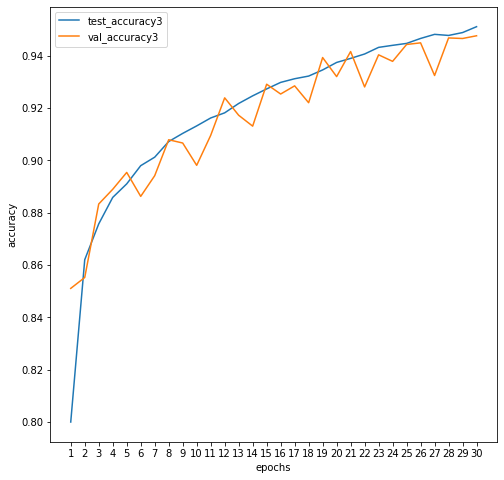

In [10]:
test_accuracy3 = history3.history["accuracy"]
val_accuracy3 = history3.history["val_accuracy"]
epochs = range(1, 31)





plt.figure(figsize=(8,8))
plt.plot(epochs, test_accuracy3, label="test_accuracy3")
plt.plot(epochs, val_accuracy3, label="val_accuracy3")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


This image plots the accuracy on test data and validation data.

In [11]:
# Fit the Functional API model
history3 = model3.fit(train_images, 
                      train_labels, 
                      epochs=30, 
                      batch_size=128,
                      validation_data=[val_images, val_labels])

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print(f"test_loss = {test_loss}, test_acc = {test_acc}")

Epoch 1/30
469/469 [==============================] - 8s 16ms/step - loss: 0.1313 - accuracy: 0.9521 - val_loss: 0.1330 - val_accuracy: 0.9488
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1302 - accuracy: 0.9535 - val_loss: 0.1379 - val_accuracy: 0.9515
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1251 - accuracy: 0.9553 - val_loss: 0.1187 - val_accuracy: 0.9579
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1251 - accuracy: 0.9553 - val_loss: 0.1142 - val_accuracy: 0.9610
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1235 - accuracy: 0.9564 - val_loss: 0.1177 - val_accuracy: 0.9617
Epoch 6/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1196 - accuracy: 0.9576 - val_loss: 0.1183 - val_accuracy: 0.9604
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1186 - accuracy: 0.9578 - val_loss: 0.1153 - val_accuracy: 0.9575